# Exercise 4: Semantics and Discourse

This session is based on lecture 8 (semantics) and 9 (discourse).

Relevant SLP chapters:
* Chapter 21 (excluding section 21.7 and 21.8)
* Chapter 23 (excluding section 23.7)
* Chapter 24
* Appendix G (on the [website](https://web.stanford.edu/~jurafsky/slp3/))


# Exercise 1: WordNet

As seen in the slides, [WordNet](https://wordnet.princeton.edu/) is a lexical database that contains *senses* (specific interpretations of words) and relations between them. Senses are accompanied by *glosses*; short descriptions that clarify the meaning of a sense.

WordNet has been used for numerous purposes: as 'smart' dictionary, as a resource to enrich texts for further processing, to provide a hierarchy to annotate images (i.e., [ImageNet](https://www.image-net.org/), [NLVR2](https://aclanthology.org/P19-1644/), [MS-COCO](https://link.springer.com/chapter/10.1007/978-3-319-10602-1_48), [Visual Genome](https://link.springer.com/article/10.1007/s11263-016-0981-7)) and more.

In this exercise you are going to explore English WordNet and do some analysis on it.

Below we install nltk and download the WordNet database. If you want to explore a (slightly different) online version, see [Open English WordNet](https://en-word.net/). We'll also use `seaborn` to make some plots.

1. Get familiar with the package by following the quickstart guide [here](https://www.nltk.org/howto/wordnet.html) (until 'Synset Closures'), the general [documentation](https://www.nltk.org/api/nltk.corpus.reader.wordnet.html) is also useful.
2. Start from the synset `racer.n.02` ("a fast car that competes in races"). Can you reach the synset `pedicab.n.01` ("a tricycle (usually propelled by pedalling) used in for transporting passengers for hire") via common hypernym(s)? If you can reach it, what is/are the shortest path(s) to it (the number *and* the path itself)?
3. Look at the `meronyms` associated with `car`, then do the same for `ambulance`, what do you notice?
4. For the Noun, Verb, Adjective and Adverb categories, plot the number of senses against the length of the lemmas in each category. Do you notice a pattern? Do the categories differ?

In [ ]:
!pip install -q nltk seaborn pandas

In [ ]:
from collections import Counter

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import nltk

from nltk.corpus import wordnet as wn

nltk.download("wordnet")

[nltk_data] Downloading package wordnet to /home/kushal/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
# TODO: Your code here for testing out the quickstart guide and getting
# familiar with the package


In [ ]:
start = wn.synset('racer.n.02')
target = wn.synset('pedicab.n.01')

# TODO: your code here for the assignments

lowest_common = start.lowest_common_hypernyms(target)[0]
distance = start.shortest_path_distance(target)

start_path = [start]

# First we climb up from the start
for hyper in start.closure(lambda s: s.hypernyms()):
    start_path.append(hyper)
    if hyper == lowest_common:
        break

target_path = []
# Then we climb up from the target
for hyper in target.closure(lambda s: s.hypernyms()):
    target_path.append(hyper)
    if hyper == lowest_common:
        break

target_path.pop() # we can remove the lowest_common since we already have it
# We have to reverse this path since we want to know from start to target
target_path.reverse()
target_path.append(target) # also add the target itself

start_path.extend(target_path)

print(f'Lowest common hypernym: {lowest_common} (distance {distance})')

start_path

Lowest common hypernym: Synset('wheeled_vehicle.n.01') (distance 6)


[Synset('racer.n.02'),
 Synset('car.n.01'),
 Synset('motor_vehicle.n.01'),
 Synset('self-propelled_vehicle.n.01'),
 Synset('wheeled_vehicle.n.01'),
 Synset('tricycle.n.01'),
 Synset('pedicab.n.01')]

In [ ]:
print(wn.synsets('car')[0].definition())
print(wn.synsets('car')[0].part_meronyms())
print()
print(wn.synsets('ambulance')[0].definition())
print(wn.synsets('ambulance')[0].part_meronyms())

a motor vehicle with four wheels; usually propelled by an internal combustion engine
[Synset('accelerator.n.01'), Synset('air_bag.n.01'), Synset('auto_accessory.n.01'), Synset('automobile_engine.n.01'), Synset('automobile_horn.n.01'), Synset('buffer.n.06'), Synset('bumper.n.02'), Synset('car_door.n.01'), Synset('car_mirror.n.01'), Synset('car_seat.n.01'), Synset('car_window.n.01'), Synset('fender.n.01'), Synset('first_gear.n.01'), Synset('floorboard.n.02'), Synset('gasoline_engine.n.01'), Synset('glove_compartment.n.01'), Synset('grille.n.02'), Synset('high_gear.n.01'), Synset('hood.n.09'), Synset('luggage_compartment.n.01'), Synset('rear_window.n.01'), Synset('reverse.n.02'), Synset('roof.n.02'), Synset('running_board.n.01'), Synset('stabilizer_bar.n.01'), Synset('sunroof.n.01'), Synset('tail_fin.n.02'), Synset('third_gear.n.01'), Synset('window.n.02')]

a vehicle that takes people to and from hospitals
[]


The reason the ambulance has no meronyms is because they are transitive, if a hypernym has them, so do its hyponyms

Text(0, 0.5, 'Lemma length')

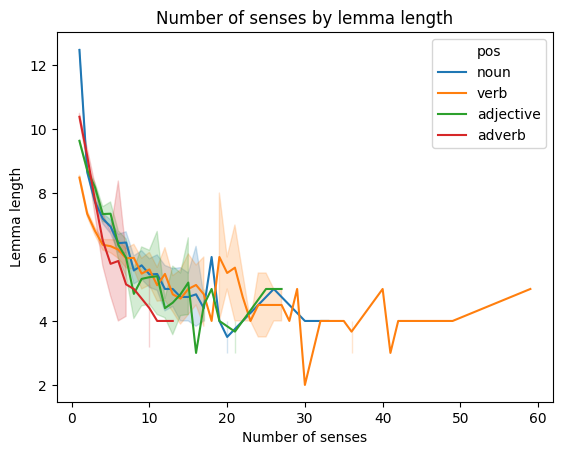

In [ ]:
pos2label = {'n': 'noun', 'v': 'verb', 'a': 'adjective', 'r': 'adverb'}
results = {'x': [], 'y': [], 'pos': []}
for pos in [wn.NOUN, wn.VERB, wn.ADJ, wn.ADV]:
    # Your code here

    lemma_count = Counter()
    for syn in wn.all_synsets(pos=pos):
        for lemma in syn.lemmas():
            lemma_count[lemma] += 1

    x = list(lemma_count.values())
    y = [len(lem.name()) for lem in lemma_count.keys()]

    results['pos'].extend([pos2label[pos]] * len(x))
    results['x'].extend(x)
    results['y'].extend(y)


df = pd.DataFrame().from_dict(results)

plot = sns.lineplot(df, x='x', y='y', hue='pos')
plot.set_title('Number of senses by lemma length')
plot.set_xlabel('Number of senses')
plot.set_ylabel('Lemma length')


There is a rough trend where shorter lemmas are more ambiguous (i.e., they have more senses associated with them).
While there is some noise, we can see the trend.

# Exercise 2: Coreference resolution
For this exercise on coreference resolution, we direct you to a tutorial on building an end-to-end neural coreference resolution system:

https://explosion.ai/blog/coref

This tutorial will walk you through a neural coreference resolution system from [Dobrovolskii (2021)](https://aclanthology.org/2021.emnlp-main.605/), which is a later improvement to the e2e coref system by [Lee et al (2017)](https://aclanthology.org/D17-1018/) discussed in the SLP textbook chapter 23.6.


If you are interested in reproducing the coreference resolution implementations from Lee et al (2017) and Joshi et al (2020), we direct you to their respective codebases:

* [Lee et al (2017)](https://github.com/shayneobrien/coreference-resolution.git)
* [Joshi et al (2020)](https://github.com/mandarjoshi90/coref)

The dataset used for these implementations can be downloaded from: https://data.mendeley.com/datasets/zmycy7t9h9/2
The Lee et al (2017) implementation requires access to Glove and Turin embeddings that can be downloaded from:
https://nlp.stanford.edu/projects/glove/; https://www.kaggle.com/datasets/alvations/turian-embeddings/data


In [ ]:
# your code here